In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv('data/Customers.csv')
transactions = pd.read_csv('data/Transactions.csv')

In [3]:
data = pd.merge(customers, transactions, on='CustomerID', how='inner')

In [4]:
data_numeric = data.select_dtypes(include=[np.number]).dropna()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [6]:
db_scores = []
silhouette_scores = []
k_values = range(2, 11)

In [8]:
for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    db_index = davies_bouldin_score(data_scaled, clusters)
    silhouette_avg = silhouette_score(data_scaled, clusters)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

In [9]:
optimal_k = k_values[np.argmin(db_scores)]


In [11]:
final_kmeans = KMeans(n_clusters=optimal_k,n_init=10,random_state=42)
data['Cluster'] = final_kmeans.fit_predict(data_scaled)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

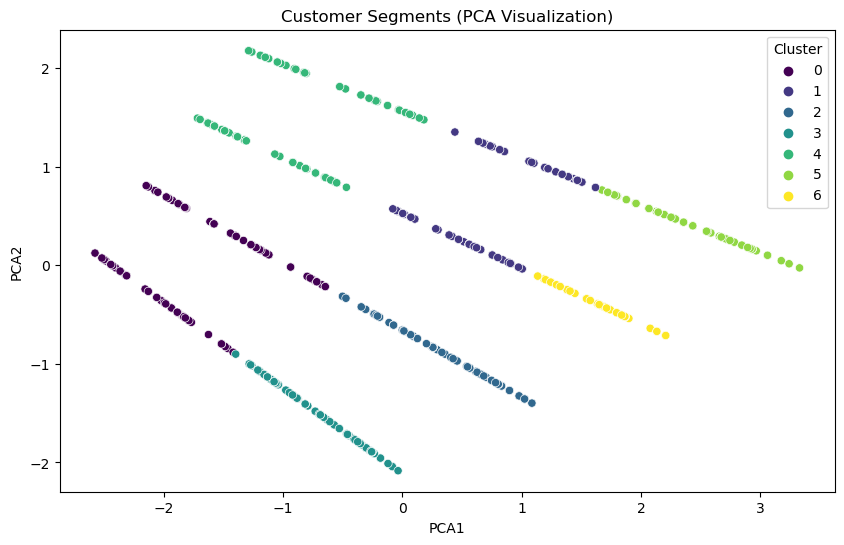

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()

In [14]:
print(f"Optimal number of clusters: {optimal_k}")
print(f"DB Index for optimal clusters: {db_scores[np.argmin(db_scores)]:.4f}")
for k, db, sil in zip(k_values, db_scores, silhouette_scores):
    print(f"Clusters: {k}, DB Index: {db:.4f}, Silhouette Score: {sil:.4f}")


Optimal number of clusters: 7
DB Index for optimal clusters: 0.7032
Clusters: 2, DB Index: 0.9442, Silhouette Score: 0.4180
Clusters: 3, DB Index: 0.8171, Silhouette Score: 0.4556
Clusters: 4, DB Index: 0.7517, Silhouette Score: 0.4668
Clusters: 5, DB Index: 0.7969, Silhouette Score: 0.4524
Clusters: 6, DB Index: 0.7964, Silhouette Score: 0.4809
Clusters: 7, DB Index: 0.7032, Silhouette Score: 0.5031
Clusters: 8, DB Index: 0.7362, Silhouette Score: 0.4933
Clusters: 9, DB Index: 0.7183, Silhouette Score: 0.5051
Clusters: 10, DB Index: 0.7372, Silhouette Score: 0.5206


In [19]:
data.to_csv('Clustered_Customers.csv', index=False)


In [28]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
input_file = 'Clustered_Customers.csv'
output_file = 'Formatted_Clustered_Customers.xlsx'
data = pd.read_csv(input_file)
desired_order = [
    'CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
    'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price',
    'Cluster', 'PCA1', 'PCA2'
]
data = data[[col for col in desired_order if col in data.columns] + 
            [col for col in data.columns if col not in desired_order]]
if 'Cluster' in data.columns:
    data = data.sort_values(by='Cluster')
data.to_excel(output_file, index=False)